# Case Study on Probability for Data Science

Problem Statement:
To make a suitable machine learning algorithm to predict if the mushroom is edible or poisonous (e or p) using the given dataset. (Along with other ML algorithms, Naïve Bayes’ Classifier should be applied) Also, if some data pre-processing is necessary do that as well.

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the dataset
data=pd.read_csv('mushrooms.csv')

In [3]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
data.shape

(8124, 23)

In [5]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [6]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
#Checking the missing values
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [9]:
for i in data.columns:
    print(i)
    print(data[i].value_counts())
    print('-----------')

class
e    4208
p    3916
Name: class, dtype: int64
-----------
cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
-----------
cap-surface
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
-----------
cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64
-----------
bruises
f    4748
t    3376
Name: bruises, dtype: int64
-----------
odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64
-----------
gill-attachment
f    7914
a     210
Name: gill-attachment, dtype: int64
-----------
gill-spacing
c    6812
w    1312
Name: gill-spacing, dtype: int64
-----------
gill-size
b    5612
n    2512
Name: gill-size, dtype: int64
-----------
gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-

In [10]:
#Stalk root column contain a '?'
data['stalk-root'].unique()

array(['e', 'c', 'b', 'r', '?'], dtype=object)

In [11]:
#Replace '?' to NaN
data.replace('?',np.nan,inplace=True)

In [12]:
data.isna().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [13]:
mode=data['stalk-root'].mode().values[0]
data['stalk-root'].fillna(value=mode,inplace=True)

In [14]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [15]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [16]:
#Label encoding to convert categorical values to ordinal values
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in data.columns:
    data[column]=labelencoder.fit_transform(data[column])

In [17]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [18]:
data['veil-type'].value_counts()

0    8124
Name: veil-type, dtype: int64

This shows that the feature veil-type has only one unique value and hence it won't contribute anything to the dataset. Therefore, we can remove this feature fom the data.

In [19]:
data=data.drop(['veil-type'],axis=1)

In [20]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

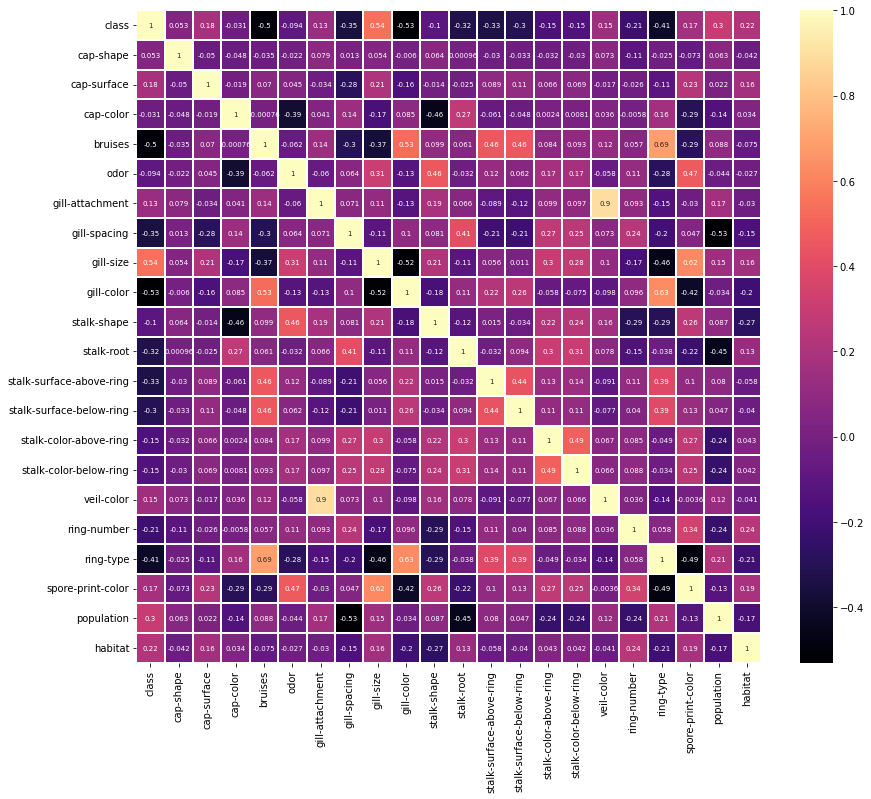

In [21]:
#Plotting heatmap to observe the correlation between various features
corr=data.corr()
plt.figure(figsize=(14,12))
sns.heatmap(corr,annot=True,linewidths=0.1,cmap='magma',annot_kws={'size':7})
plt.yticks(rotation=0);

There is a high correlation between veil-color and gill-attachment, therefore have to drop one of the column.

In [22]:
Mushroom = data.drop(["gill-attachment"],axis=1)

In [23]:
Mushroom.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root',
       'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color',
       'ring-number', 'ring-type', 'spore-print-color', 'population',
       'habitat'],
      dtype='object')

In [24]:
Mushroom.shape

(8124, 21)

Reduced the number of features(columns) from 23 to 21.

In [25]:
#Feature selection
x= Mushroom.drop(['class'], axis=1)                              # Feature columns
y= Mushroom['class']                                             # Target column

# Model Preparation

Testing the Impact of different Models

1.Logistic Regression

2.K nearest neighbours

3.Support vector Machine

4.Naive Bayes' Classifier

5.Random forest Classifier

6.Decision Tree

In [26]:
#split the Dataset into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42,test_size=0.25)

In [27]:
x_train.shape

(6093, 20)

In [28]:
y_train.shape

(6093,)

# Logistic regression classification

In [29]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred_lr = logit_model.predict(x_test)

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print("Test Accuracy: {}%".format(round(logit_model.score(x_test,y_test)*100,2)))

Test Accuracy: 95.62%


In [31]:
print("Accuracy is:",accuracy_score(y_test,y_pred_lr))
print("precision is:",precision_score(y_test,y_pred_lr,average="macro"))
print("recall is",recall_score(y_test,y_pred_lr,average="macro"))
print("f1 is",f1_score(y_test,y_pred_lr,average="macro"))

Accuracy is: 0.9561792220580995
precision is: 0.9561067924813809
recall is 0.9562369013428549
f1 is 0.9561604745055838


In [32]:
t=[]
t.append(['Logistic Regession',(logit_model.score(x_test,y_test)*100)])

# KNeighborsClassifier

In [58]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,13,2)                         # optimum k value is choosen as the square root of the number of datapoints
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

Text(0, 0.5, 'accuracy')

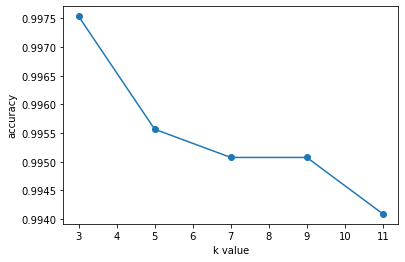

In [34]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [35]:
acc_values

[0.9975381585425899,
 0.9955686853766618,
 0.9950763170851797,
 0.9950763170851797,
 0.9940915805022157]

In [59]:
classifier=KNeighborsClassifier(n_neighbors=3,metric='minkowski')                # Replacing k with highest accuracy value '3'
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)  
print("Test Accuracy: {}%".format(round(classifier.score(x_test,y_test)*100,2)))

Test Accuracy: 99.75%


In [60]:
t.append(['KNN Classifier',(classifier.score(x_test,y_test)*100)])

# Decision Tree Algorithm

In [38]:
from sklearn.tree import DecisionTreeClassifier
data_model= DecisionTreeClassifier()
data_model.fit(x_train,y_train)
y_pred=data_model.predict(x_test)
print("Test Accuracy: {}%".format(round(data_model.score(x_test,y_test)*100,2)))

Test Accuracy: 100.0%


In [39]:
t.append(['DecisionTreeClassifier',(data_model.score(x_test,y_test)*100)])

# Support Vector Machine

In [61]:
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear')                                     #SVM Linear
svm_linear.fit(x_train,y_train)
y_pred = svm_linear.predict(x_test)
print("Test Accuracy: {}%".format(round(svm_linear.score(x_test,y_test)*100,2)))

Test Accuracy: 97.29%


In [62]:
t.append(['SVM Radial',(svm_linear.score(x_test,y_test)*100)])

In [63]:
svm_linear = SVC(kernel='poly',degree=3)                             #SVM Polynomial
svm_linear.fit(x_train,y_train)
y_pred = svm_linear.predict(x_test)
print("Test Accuracy: {}%".format(round(svm_linear.score(x_test,y_test)*100,2)))

Test Accuracy: 100.0%


In [43]:
t.append(['SVM Polynomial',(svm_linear.score(x_test,y_test)*100)])

# Random Forest Agorithm

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print("Test Accuracy: {}%".format(round(rf.score(x_test,y_test)*100,2)))

Test Accuracy: 100.0%


In [45]:
t.append(['Random forest algorithm',(rf.score(x_test,y_test)*100)])

# Naïve Bayes' Classifier

In [46]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [47]:
y_pred=classifier.predict(x_test)
y_pred

array([0, 1, 1, ..., 0, 0, 1])

In [48]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred) 
print("Test Accuracy: {}%".format(round(classifier.score(x_test,y_test)*100,2)))

Test Accuracy: 91.19%


In [49]:
t.append(['GaussianNB',(classifier.score(x_test,y_test)*100)])

# BernoulliNB

In [50]:
from sklearn.naive_bayes import BernoulliNB
classifier=BernoulliNB()
classifier.fit(x_train,y_train)

BernoulliNB()

In [51]:
y_pred=classifier.predict(x_test)

In [52]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)
print("Test Accuracy: {}%".format(round(classifier.score(x_test,y_test)*100,2)))

Test Accuracy: 83.46%


In [53]:
t.append(['BernoulliNB',(classifier.score(x_test,y_test)*100)])

# MultinomialNB

In [54]:
from sklearn.naive_bayes import MultinomialNB
classifier2= MultinomialNB()
classifier2.fit(x_train,y_train)
y_pred=classifier2.predict(x_test)

In [55]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)
print("Test Accuracy: {}%".format(round(classifier2.score(x_test,y_test)*100,2)))

Test Accuracy: 83.26%


In [56]:
t.append(['MultinomialNB',(classifier2.score(x_test,y_test)*100)])

In [57]:
df=pd.DataFrame(t, columns=["Algorithms","Accuracy"])
df

,Algorithms,Accuracy
0,Logistic Regession,95.617922
1,KNN Classifier,99.753816
2,DecisionTreeClassifier,100.000000
3,SVM Radial,97.291974
4,SVM Polynomial,100.000000
5,Random forest algorithm,100.000000
6,GaussianNB,91.186608
7,BernoulliNB,83.456425
8,MultinomialNB,83.259478


Conclusion:
    
DecisionTreeClassifier, SVM Radial,SVM Polynomial,SVM linear and Random Forest Classifier produce 100% accuracy compared to  other models.

Naïve Bayes’ Classifier(BernoulliNB,GaussianNB,MultinomialNB) gave less prediction accuracy as compared to other ML algorithm model.So it's better to go with other algorithm other than Naïve Bayes’, for predicting the mushroom is edible or poisonous (e or p) using the given dataset.